# Nikita Pokharkar 2193161 LY IS 3

# CIFAR10 Dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


The Sequential model is a linear stack of layers.
Activation Functions -The activation functions are the main mathematical logic functions of a neural layer. Each neural layer is having a separate activation function given by the programmer. They have divided into mainly two types, linear and non-linear functions.


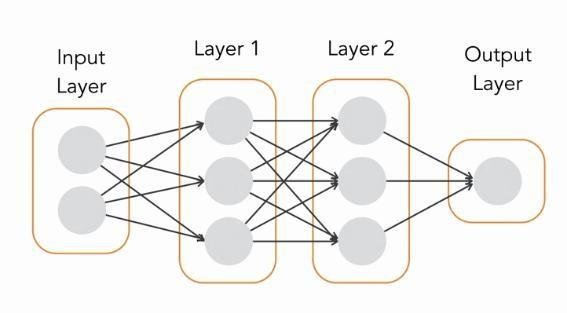

In [11]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import cifar10 

In [12]:
import numpy
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils import np_utils 

In [13]:
#load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [15]:
#normalize
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [16]:
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))


model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 351s 223ms/step - loss: 2.1063 - accuracy: 0.2146 - val_loss: 1.9286 - val_accuracy: 0.3255
Epoch 2/10
1563/1563 [==============================] - 353s 226ms/step - loss: 1.8192 - accuracy: 0.3406 - val_loss: 1.7866 - val_accuracy: 0.3494
Epoch 3/10
1563/1563 [==============================] - 335s 214ms/step - loss: 1.6429 - accuracy: 0.4020 - val_loss: 1.5820 - val_accuracy: 0.4466
Epoch 4/10
1563/1563 [==============================] - 328s 210ms/step - loss: 1.5230 - accuracy: 0.4472 - val_loss: 1.4307 - val_accuracy: 0.4833
Epoch 5/10
1563/1563 [==============================] - 332s 213ms/step - loss: 1.4368 - accuracy: 0.4797 - val_loss: 1.4384 - val_accuracy: 0.4820
Epoch 6/10
1563/1563 [==============================] - 364s 233ms/step - loss: 1.3580 - accuracy: 0.5072 - val_loss: 1.3055 - val_accuracy: 0.5304
Epoch 7/10
1563/1563 [==============================] - 322s 206ms/step - loss: 1.2946 - accuracy: 0.5319 - val_

In [ ]:
from keras.models import load_model 
model.save('D:\DL 1\CIFAR.h5')

In [ ]:
model = load_model('D:\DL 1\CIFAR.h5')

# Final Output

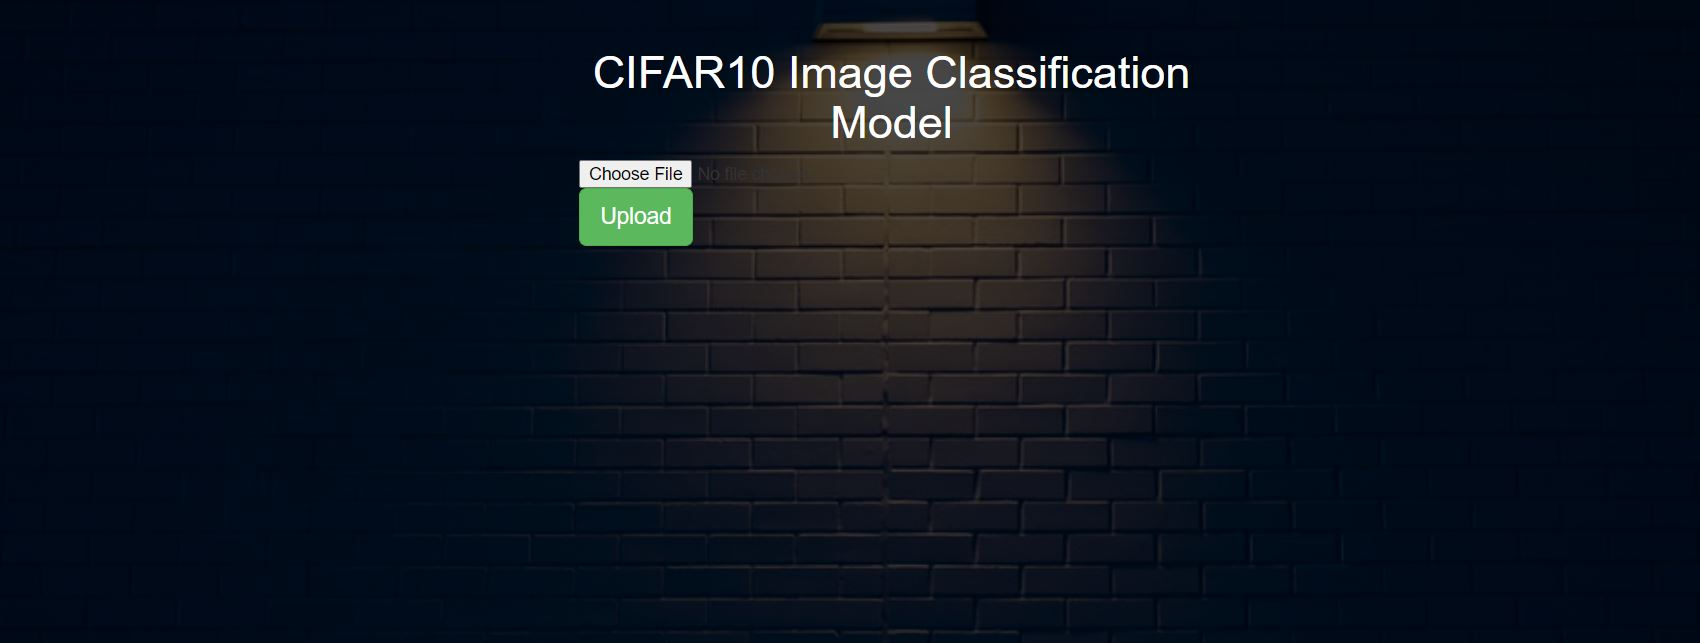

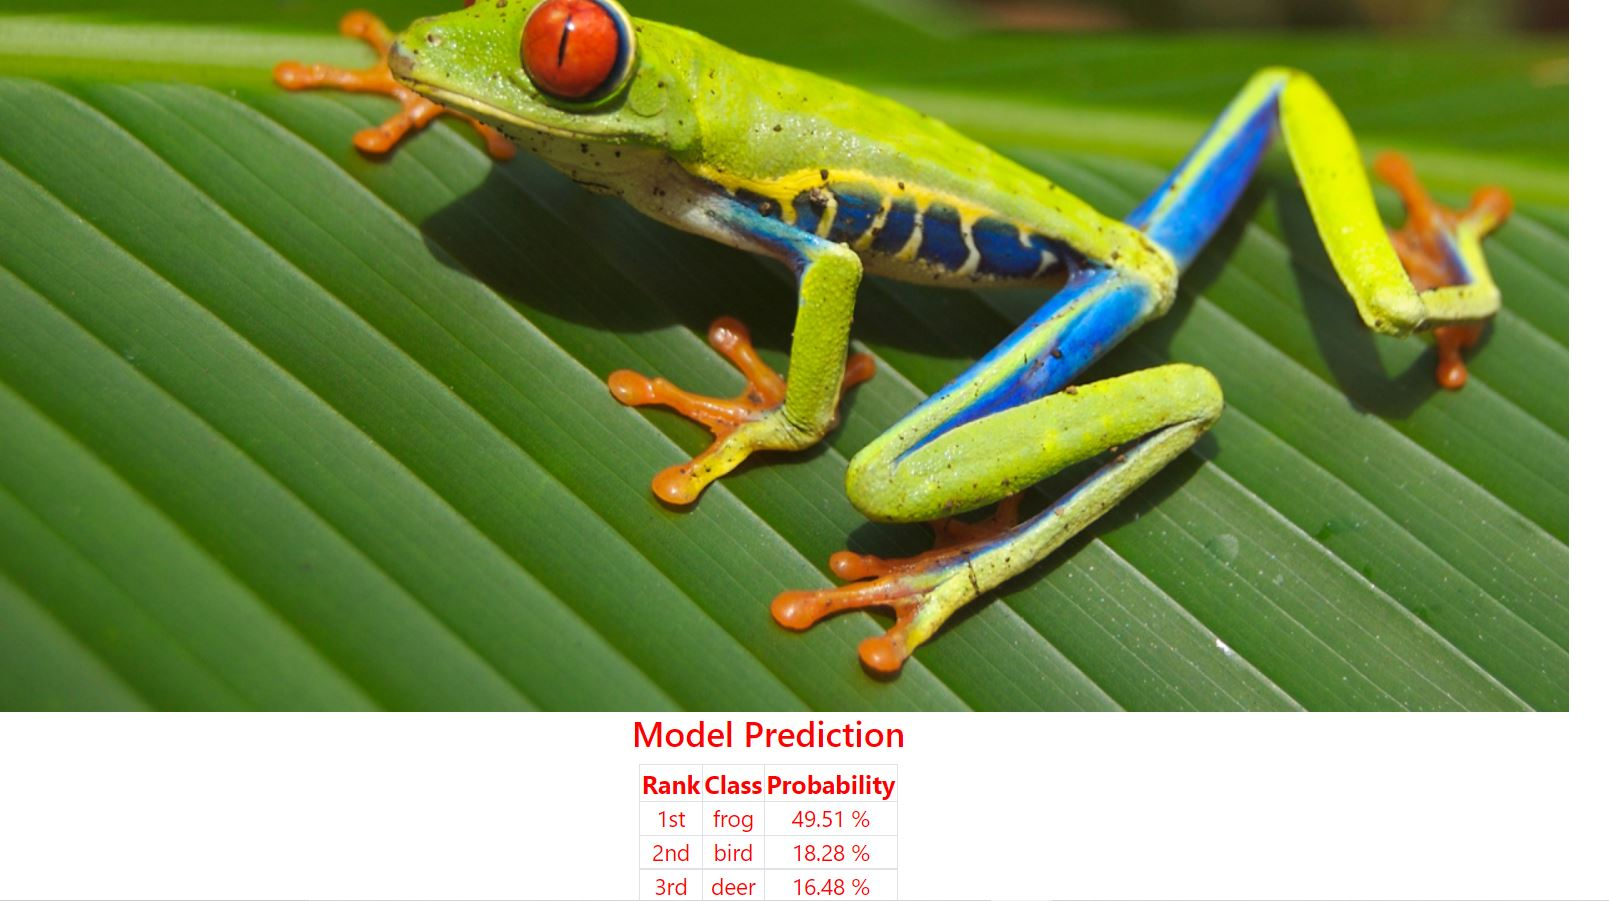

In [ ]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))